지역화폐 발행 및 이용 현황 - 경기도 지역화폐 발행 및 이용 현황 입니다.
- https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&rows=10&sortColumn=&sortDirection=&infId=6FEDD6KGEJWYCY2G15OY29527318&infSeq=2&order=&loc=&searchWord=%ED%99%94%ED%8F%90
- https://openapi.gg.go.kr/RegionMnyPublctUse?KEY=3e9686f9abff44de926e9f87c251d8b7&Type=json&pIndex=1&pSize=1

In [3]:
# libary
import pandas as pd
import numpy as np
from util.apiUtil import Api
import matplotlib.pyplot as plt
import matplotlib as mp
mp.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False

# 전역변수
save_file_name = "X01_지역화폐_발행_이용현황";

#### 02. 수집 및 csv 파일 저장

In [4]:
# 01. 데이터 수집
url = "https://openapi.gg.go.kr/RegionMnyPublctUse?KEY=3e9686f9abff44de926e9f87c251d8b7&Type=json&pIndex="
pSize = 500 # data fetch Size
df = Api.get_dataframe(url, pSize) # return pd.DataFrame

# 02. 수집결과 원본 csv 파일로 저장
df.to_csv("./data/"+save_file_name+"_source.csv", index=False)

[처리시간: 0.27 sec] 대상건수: 837, 처리건수: 837


#### 03. 수집결과 데이터 전처리

In [5]:
# 3.1. 수집결과 원본 데이터
df_src = pd.read_csv("./data/"+save_file_name+"_source.csv", encoding='utf8')

# 3.2. 수집결과 원본 상위 2개 데이터 조회
display(df_src.head(2))

# 3.3. 전처리: 값이 없는 것을 0으로 치환
df = df_src.fillna(0)

# 3.4. 전처리 결과 파일 저장
df.to_csv("./data/"+save_file_name+"_result.csv", index=False)
display(df.head(2))

,SIGUN_CD,SIGUN_NM,STD_YM,CARD_PUBLCT_CNT,CARD_CHRGNG_AMT,CARD_USE_AMT,MOBILE_GIFTCERTF_USER_CNT,MOBILE_CHRGNG_AMT,MOBILE_USE_AMT,BRNHSTRM_GIFTCERTF_SALE_AMT,BRNHSTRM_GIFTCERTF_RETRVL_AMT
0,41370,오산시,2019-07,1389.0,839823.0,625889.0,NaN,NaN,NaN,NaN,NaN
1,41630,양주시,2019-07,1860.0,1312669.0,1017916.0,NaN,NaN,NaN,NaN,NaN


,SIGUN_CD,SIGUN_NM,STD_YM,CARD_PUBLCT_CNT,CARD_CHRGNG_AMT,CARD_USE_AMT,MOBILE_GIFTCERTF_USER_CNT,MOBILE_CHRGNG_AMT,MOBILE_USE_AMT,BRNHSTRM_GIFTCERTF_SALE_AMT,BRNHSTRM_GIFTCERTF_RETRVL_AMT
0,41370,오산시,2019-07,1389.0,839823.0,625889.0,0.0,0.0,0.0,0.0,0.0
1,41630,양주시,2019-07,1860.0,1312669.0,1017916.0,0.0,0.0,0.0,0.0,0.0


#### 04. 최종 결과

In [12]:
print("API 데이터 구조")
df = pd.read_csv("./data/"+save_file_name+"_schema.csv", encoding='utf8')    # 데이터 구조
display(df.head(len(df)))

API 데이터 구조


,컬럼_ID,컬럼_명
0,SIGUN_CD,시군코드
1,SIGUN_NM,시군명
2,STD_YM,기준년월
3,CARD_PUBLCT_CNT,월별카드발행수량(건)
4,CARD_CHRGNG_AMT,월별카드충전액(천원)
5,CARD_USE_AMT,월별카드사용액(천원)
6,MOBILE_GIFTCERTF_USER_CNT,월별모바일상품권이용등록자수(명)
7,MOBILE_CHRGNG_AMT,월별모바일충전액(천원)
8,MOBILE_USE_AMT,월별모바일사용액(천원)
9,BRNHSTRM_GIFTCERTF_SALE_AMT,월별지류상품권판매액(천원)


#### 04.01. 경기도 지역화폐 월별 사용량
- 코로나 이후로 정부지원금이 늘면서 정비례하게 사용량이 늘어나는 것을 알 수 있다.

#### 01. 경기도 지역화폐 월별 사용량


,충전금액,사용금액,잔액,사용율
기준년월,,,,
2019-01,4792280,3963836,828444,82.71
2019-02,5602410,3674938,1927472,65.60
2019-03,6487053,5593724,893329,86.23
2019-04,17865048,7905257,9959791,44.25
2019-05,56935198,24948847,31986351,43.82



#### 02. 차트 출력


<AxesSubplot:title={'center':'경기도 지역화폐 월별 사용량'}, ylabel='기준년월'>

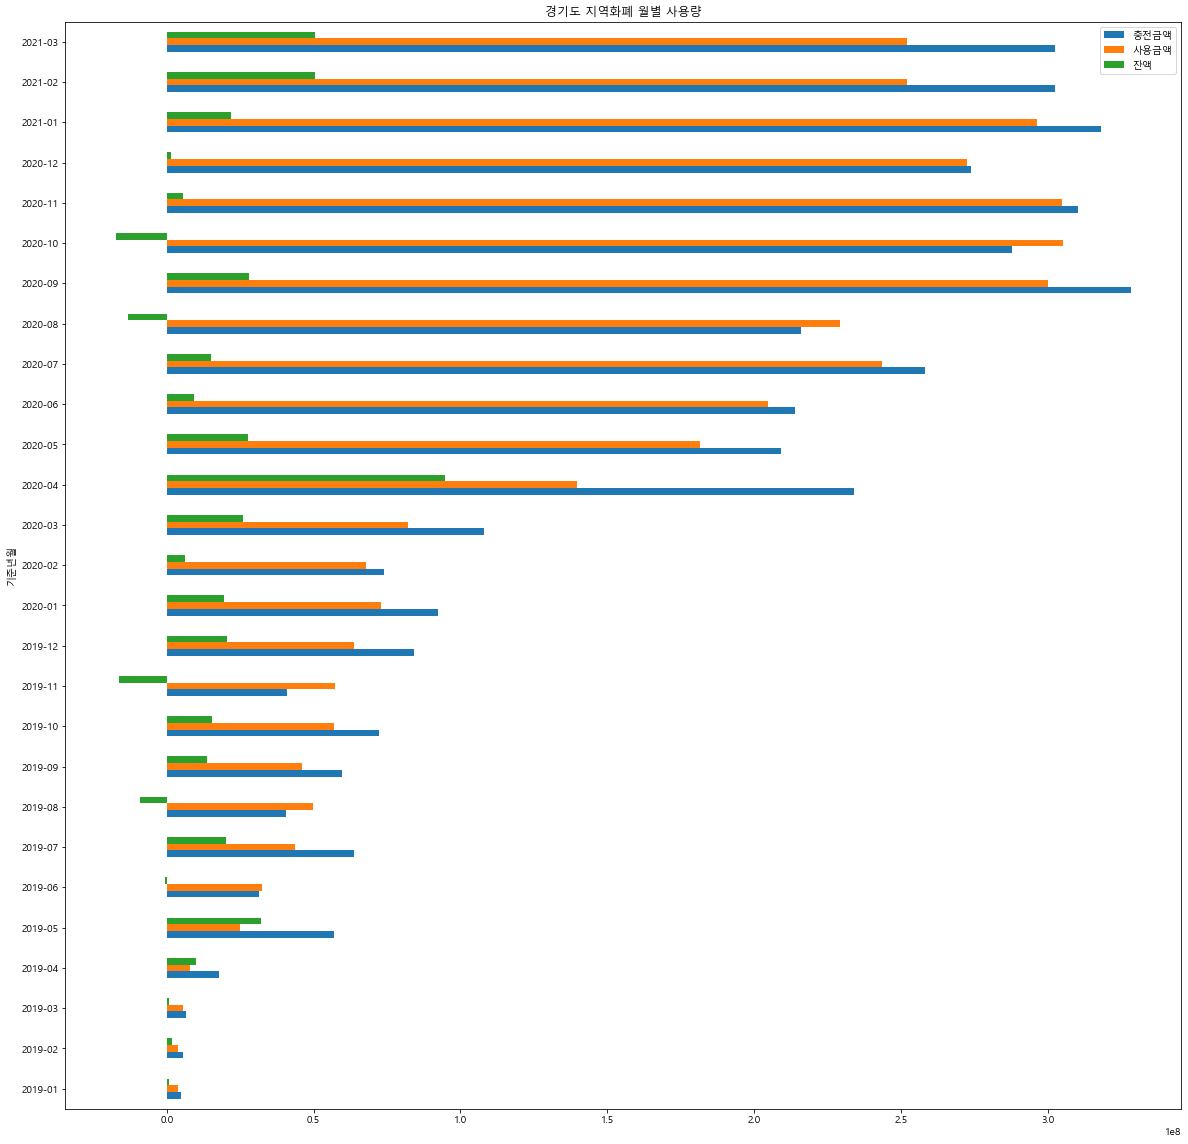

In [65]:
# 00. 전처리 된 데이터를 load
df = pd.read_csv("./data/"+save_file_name+"_result.csv", encoding='utf8')    # 데이터
# 01. 불필요 컬럼 삭제
df.drop(columns=['SIGUN_CD'], inplace=True)
# 02.01. 월별 사용량
print("#### 01. 경기도 지역화폐 월별 사용량")
df = df.groupby(by='STD_YM').sum()
df['충전금액'] = df.CARD_CHRGNG_AMT + df.MOBILE_CHRGNG_AMT
df['사용금액'] = df.CARD_USE_AMT + df.MOBILE_USE_AMT
df['잔액'] = df.충전금액 - df.사용금액
df = df_ym.astype({'충전금액': int, '사용금액': int, '잔액': int})
df['사용율'] = round(df.사용금액 / df.충전금액 * 100, 2)
df = df.filter(items=["충전금액","사용금액","잔액","사용율"])
display(df.head(5))
print("\n#### 02. 차트 출력")
df.index.name = '기준년월'
df.filter(items=["충전금액","사용금액","잔액"]).plot(kind='barh' # line, bar, barh, kde, density
  , title="경기도 지역화폐 월별 사용량"
  , grid=False
  , legend=True
  , figsize = (20, 20)
)